In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ley de Enfriamiento de Newton

La **Ley de Enfriamiento de Newton** establece que la rapidez con que cambia la temperatura de un cuerpo es **proporcional** a la diferencia entre su temperatura y la del ambiente:

$$
\frac{dT}{dt} = -k (T - T_{\text{amb}})
$$

donde:

*  $T(t$): temperatura del cuerpo en el tiempo $t$
* $T_{\text{amb}}$ : temperatura constante del ambiente
*  $k > 0$ : constante de proporcionalidad que depende del medio y del objeto


Si en $t = 0$, $T(t=0) = T_0$:
$$
\boxed{T(t) = T_{\text{amb}} + (T_0 - T_{\text{amb}}) e^{-kt}}
$$

---
*  $e^{-kt}$  indica una **decadencia exponencial**: el cuerpo se enfría más rápido al inicio y más lento al acercarse a $T_{\text{amb}}$.
* El equilibrio térmico ocurre cuando  $T = T_{\text{amb}}$ .
*  $k$  mide la **rapidez de enfriamiento**: a mayor (k), más rápido se igualan las temperaturas.


k_fit= 0.061784421543334016 T0_fit0 79.21205554432728


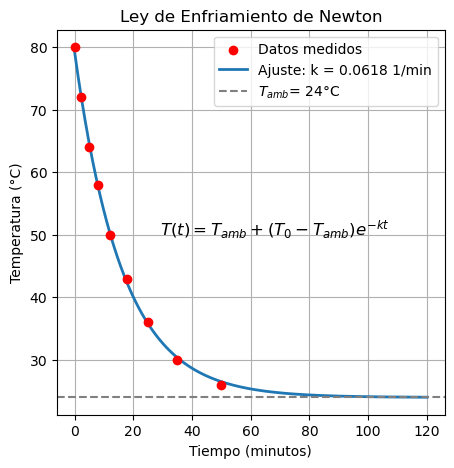

In [2]:
# --- Datos simulados de medición ---
t_data = np.array([0, 2, 5, 8, 12, 18, 25, 35, 50])  # tiempo en minutos
T_data = np.array([80, 72, 64, 58, 50, 43, 36, 30, 26])  # temperatura medida C

# --- Temperatura ambiente conocida ---
T_amb = 24 #C

# --- Modelo de enfriamiento de Newton ---
def newton_enf(t, k, T0):
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# --- Ajuste de la curva ---
params, cov = curve_fit(newton_enf, t_data, T_data, p0=[0.05, 80])
k_fit, T0_fit = params

print('k_fit=', k_fit,'T0_fit0', T0_fit)

# --- Curva ajustada ---
t_fit = np.linspace(0, 120, 200)
T_fit = newton_enf(t_fit, k_fit, T0_fit)


# --- Gráfica ---
plt.figure(figsize=(5,5))
plt.scatter(t_data, T_data, color='red', label='Datos medidos', zorder=3)
plt.plot(t_fit, T_fit, label=f'Ajuste: k = {k_fit:.4f} 1/min', linewidth=2)
plt.axhline(T_amb, color='gray', linestyle='--', label=r'$T_{amb}$= 24°C')
plt.text(x=29, y=50, s= r'$T(t)=T_{amb}+(T_0-T_{amb})e^{-kt}$', fontsize=12)
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Ley de Enfriamiento de Newton')
plt.legend()
plt.grid(True)
plt.show()